In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) # Warnin 방지용
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc

%matplotlib inline
#sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,9)

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
people = pd.read_csv('data2/dw_fire_fighter.csv', encoding='ansi')
people.head()

,occupation,occupation_code,position,position_code,year,fire_station,fire_station_code,cnt_of_officers
0,소방직,OC001,소방감,OC001-001,2019,소방재난본부,FS001,0
1,소방직,OC001,소방감,OC001-001,2019,소방학교,FS002,0
2,소방직,OC001,소방감,OC001-001,2019,중부소방서,FS003,0
3,소방직,OC001,소방감,OC001-001,2019,부산진소방서,FS004,0
4,소방직,OC001,소방감,OC001-001,2019,동래소방서,FS005,0


In [4]:
occupation = []
for o in people['occupation']:
    if o not in occupation:
        occupation.append(o)
    
occupation_cnt_sum = []
for i in range(len(occupation)):
    oc = people[people.occupation == occupation[i]]
    ocs = oc['cnt_of_officers'].sum()
    occupation_cnt_sum.append(ocs)
    
fire_station = []
for s in people['fire_station']:
    if s not in fire_station:
        fire_station.append(s)

fire_station_cnt_sum = []
for i in range(len(fire_station)):
    fc = people[people.fire_station == fire_station[i]]
    fcs = fc['cnt_of_officers'].sum()
    fire_station_cnt_sum.append(fcs)
    
oc_df = pd.DataFrame({
    'occupation':occupation,
    'occupation_cnt_sum':occupation_cnt_sum
})

fs_df = pd.DataFrame({
    'fire_station':fire_station,
    'fire_station_cnt_sum':fire_station_cnt_sum
})

del fire_station[0]
del fire_station[0]
del fire_station_cnt_sum[0]
del fire_station_cnt_sum[0]

fire_station, fire_station_cnt_sum

(['중부소방서',
  '부산진소방서',
  '동래소방서',
  '북부소방서',
  '사하소방서',
  '해운대소방서',
  '금정소방서',
  '남부소방서',
  '강서소방서',
  '기장소방서',
  '항만소방서'],
 [256, 315, 280, 391, 261, 265, 256, 260, 257, 233, 258])

In [5]:
factor = pd.read_csv('data2/dw_fire_fighting.csv', encoding='ansi')
factor.head()

,fire_date,city,district,district_code,fire_type,type_code,fire_source,fire_source_code,fire_factor,fire_factor_code,casualties,dead,injury,property_damage,place,place_code
0,2019-01,부산광역시,부산진구,D07,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,45,기타,P05
1,2019-01,부산광역시,남구,D04,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,2997,공동주택,P02
2,2019-01,부산광역시,사상구,D09,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,0,단독주택,P07
3,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,"담뱃불, 라이터불",S07,부주의,F01,0,0,0,113,기타,P05
4,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,65,단독주택,P07


In [6]:
# 월 단위
month = []
for m in factor['fire_date']:
    if m not in month:
        month.append(m)
        
# 월 화재건수
monthsum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ms = m['fire_date'].count()
    monthsum.append(ms)
    
# 월 피해규모
m_damagesum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ds = m['property_damage'].sum()
    m_damagesum.append(ds)
    
# 월별 화재건수
month_df = pd.DataFrame({
    'fire_date': month,
    'occur_cnt': monthsum
})

# 월별 피해규모
month_damage_df = pd.DataFrame({
    'fire_date' : month,
    'property_damage_sum_k' : m_damagesum
})

In [7]:
district = [] # 구
district_code = [] # 구 코드
for c in factor['district']:
    if c not in district:
        district.append(c)
for d in factor['district_code']:
    if d not in district_code:
        district_code.append(d)

district_sum = [] # 구 발생건수
for i in range(len(district)):
    d = factor[factor.district == district[i]]   
    ds = d['district'].count()
    district_sum.append(ds)
    
# 구 피해규모
d_damage_sum = []
for i in range(len(district)):
    d = factor[factor.district == district[i]]
    ds = d['property_damage'].sum()
    d_damage_sum.append(ds)
    
district_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'occur_cnt' : district_sum
})

d_damage_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'district_property_damage_k': d_damage_sum
})

dd_df = pd.DataFrame({
    'district':district,
    'district_code':district_code,
    'occur_cnt': district_sum,
    'district_property_damage_k':d_damage_sum
})

In [8]:
jungbu = district_df['occur_cnt'][6] + district_df['occur_cnt'][11] + district_df['occur_cnt'][13]
busanjin = district_df['occur_cnt'][6] + district_df['occur_cnt'][1] + district_df['occur_cnt'][0]
dongrae = district_df['occur_cnt'][5] + district_df['occur_cnt'][14] + district_df['occur_cnt'][0]
bukbu = district_df['occur_cnt'][2] + district_df['occur_cnt'][15]
saha = district_df['occur_cnt'][9]
haeundae = district_df['occur_cnt'][4]
gumjung = district_df['occur_cnt'][12] + district_df['occur_cnt'][5] + district_df['occur_cnt'][4]
nambu = district_df['occur_cnt'][10] + district_df['occur_cnt'][1]
gangseo = district_df['occur_cnt'][3]
gijang = district_df['occur_cnt'][8] + district_df['occur_cnt'][4]
hangman = district_df['occur_cnt'][7] + district_df['occur_cnt'][6] + district_df['occur_cnt'][13] + district_df['occur_cnt'][1]

# 소방서 관할구역 발생건수 합
fire_station_occur_cnt = [jungbu, busanjin, dongrae, bukbu, saha, haeundae, gumjung, nambu, gangseo, gijang, hangman]

fsoc_df = pd.DataFrame({
    'fire_station':fire_station,
    'fire_station_occur_cnt':fire_station_occur_cnt,
    'fire_station_cnt_sum':fire_station_cnt_sum
})

fsoc_df

,fire_station,fire_station_occur_cnt,fire_station_cnt_sum
0,중부소방서,235,256
1,부산진소방서,536,315
2,동래소방서,537,280
3,북부소방서,311,391
4,사하소방서,226,261
5,해운대소방서,215,265
6,금정소방서,516,256
7,남부소방서,265,260
8,강서소방서,243,257
9,기장소방서,378,233


In [9]:
dd_df

,district,district_code,occur_cnt,district_property_damage_k
0,부산진구,D07,285,310881
1,남구,D04,162,237793
2,사상구,D09,190,522456
3,강서구,D01,243,619501
4,해운대구,D16,215,589675
5,동래구,D06,150,162916
6,동구,D05,89,58212
7,영도구,D14,94,179840
8,기장군,D03,163,1293514
9,사하구,D10,226,630273


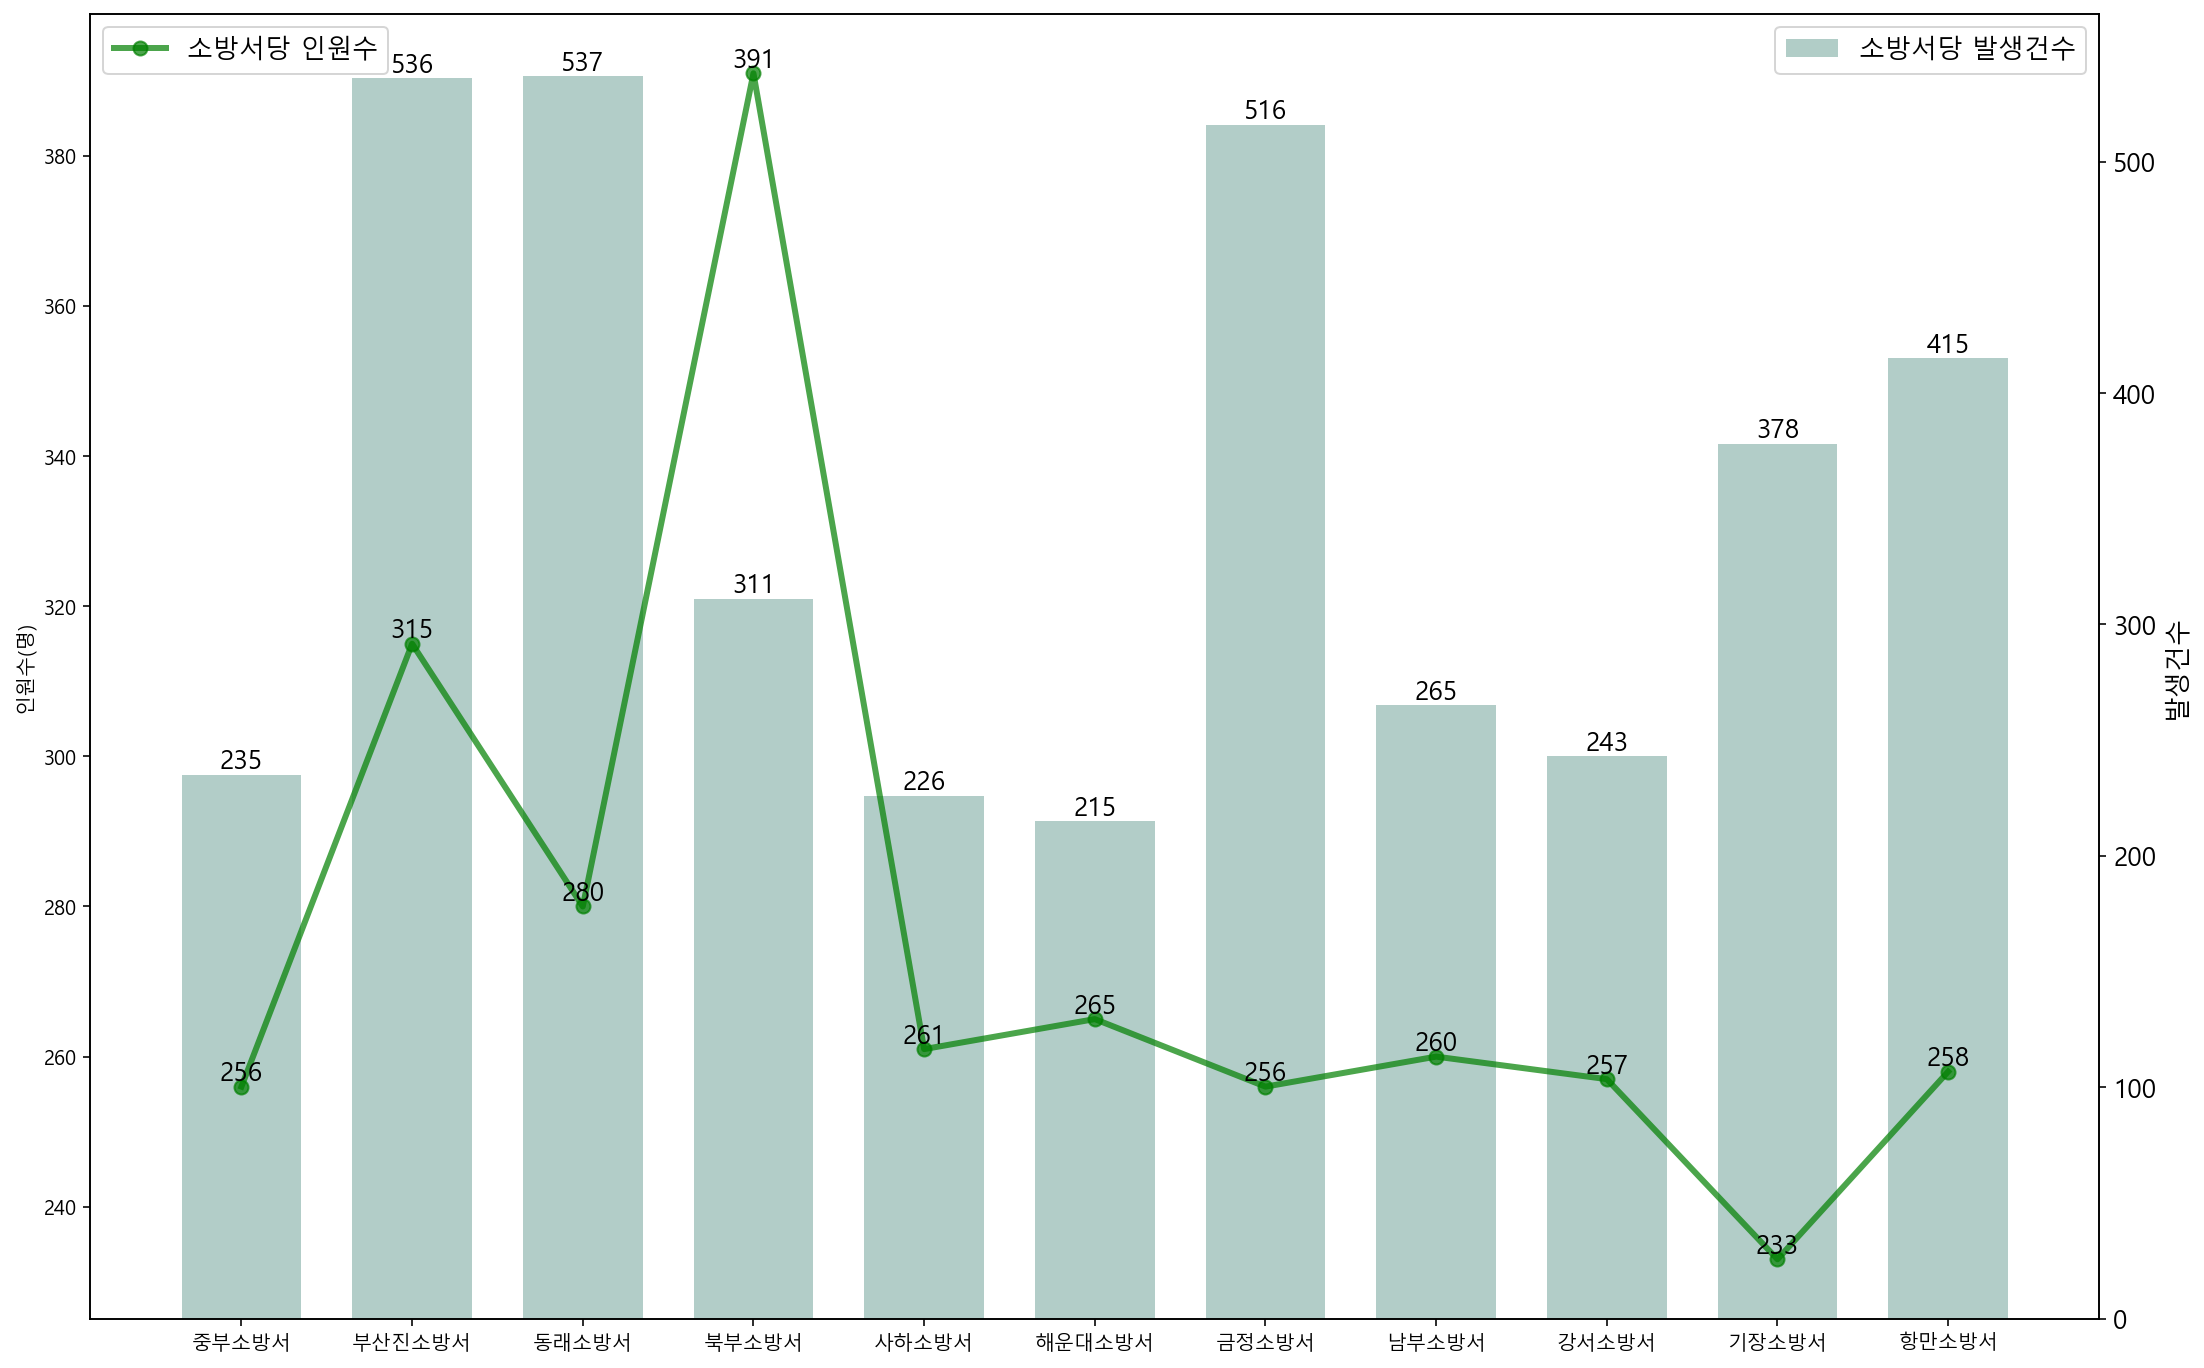

In [10]:
fig, ax1 = plt.subplots(figsize=(18,12))
plt.rc('font', size=13)
plt.rc('xtick', labelsize=13)
ax1.plot(fire_station, fire_station_cnt_sum, color='green', markersize=7, linewidth=3, alpha=0.7, label='소방서당 인원수', marker='o')
for i, v in enumerate(fire_station):
    plt.text(v, fire_station_cnt_sum[i], str(fire_station_cnt_sum[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_ylabel('인원수(명)')
ax2 = ax1.twinx()
ax2.bar(fire_station, fire_station_occur_cnt, color='#92b8b1', label='소방서당 발생건수', alpha=0.7, width=0.7)
for i, v in enumerate(fire_station):
    plt.text(v, fire_station_occur_cnt[i], str(fire_station_occur_cnt[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2.set_ylabel('발생건수')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [11]:
infra = pd.read_csv('data2/dw_fire_fighting_infra.csv', encoding='ansi')
infra.head()

,department,location,district,people,pump,tank,high_refractive_index,structure,first_aid,"chemistry, etc"
0,소방재난본부,부산광역시 연제구 고분로 216,연제구,367,2,0,NaN,2,2,41
1,중부소방서,부산광역시 중구 중앙대로 110,중구,273,7,3,2.0,3,7,13
2,부산진소방서,부산광역시 부산진구 서전로 43,부산진구,339,10,6,2.0,3,9,13
3,동래소방서,부산광역시 연제구 고분로 216,연제구,299,7,5,2.0,3,8,13
4,북부소방서,부산광역시 사상구 삼덕로 17,사상구,409,12,10,3.0,3,11,15


In [ ]:
plt.plot(infra['department'], )

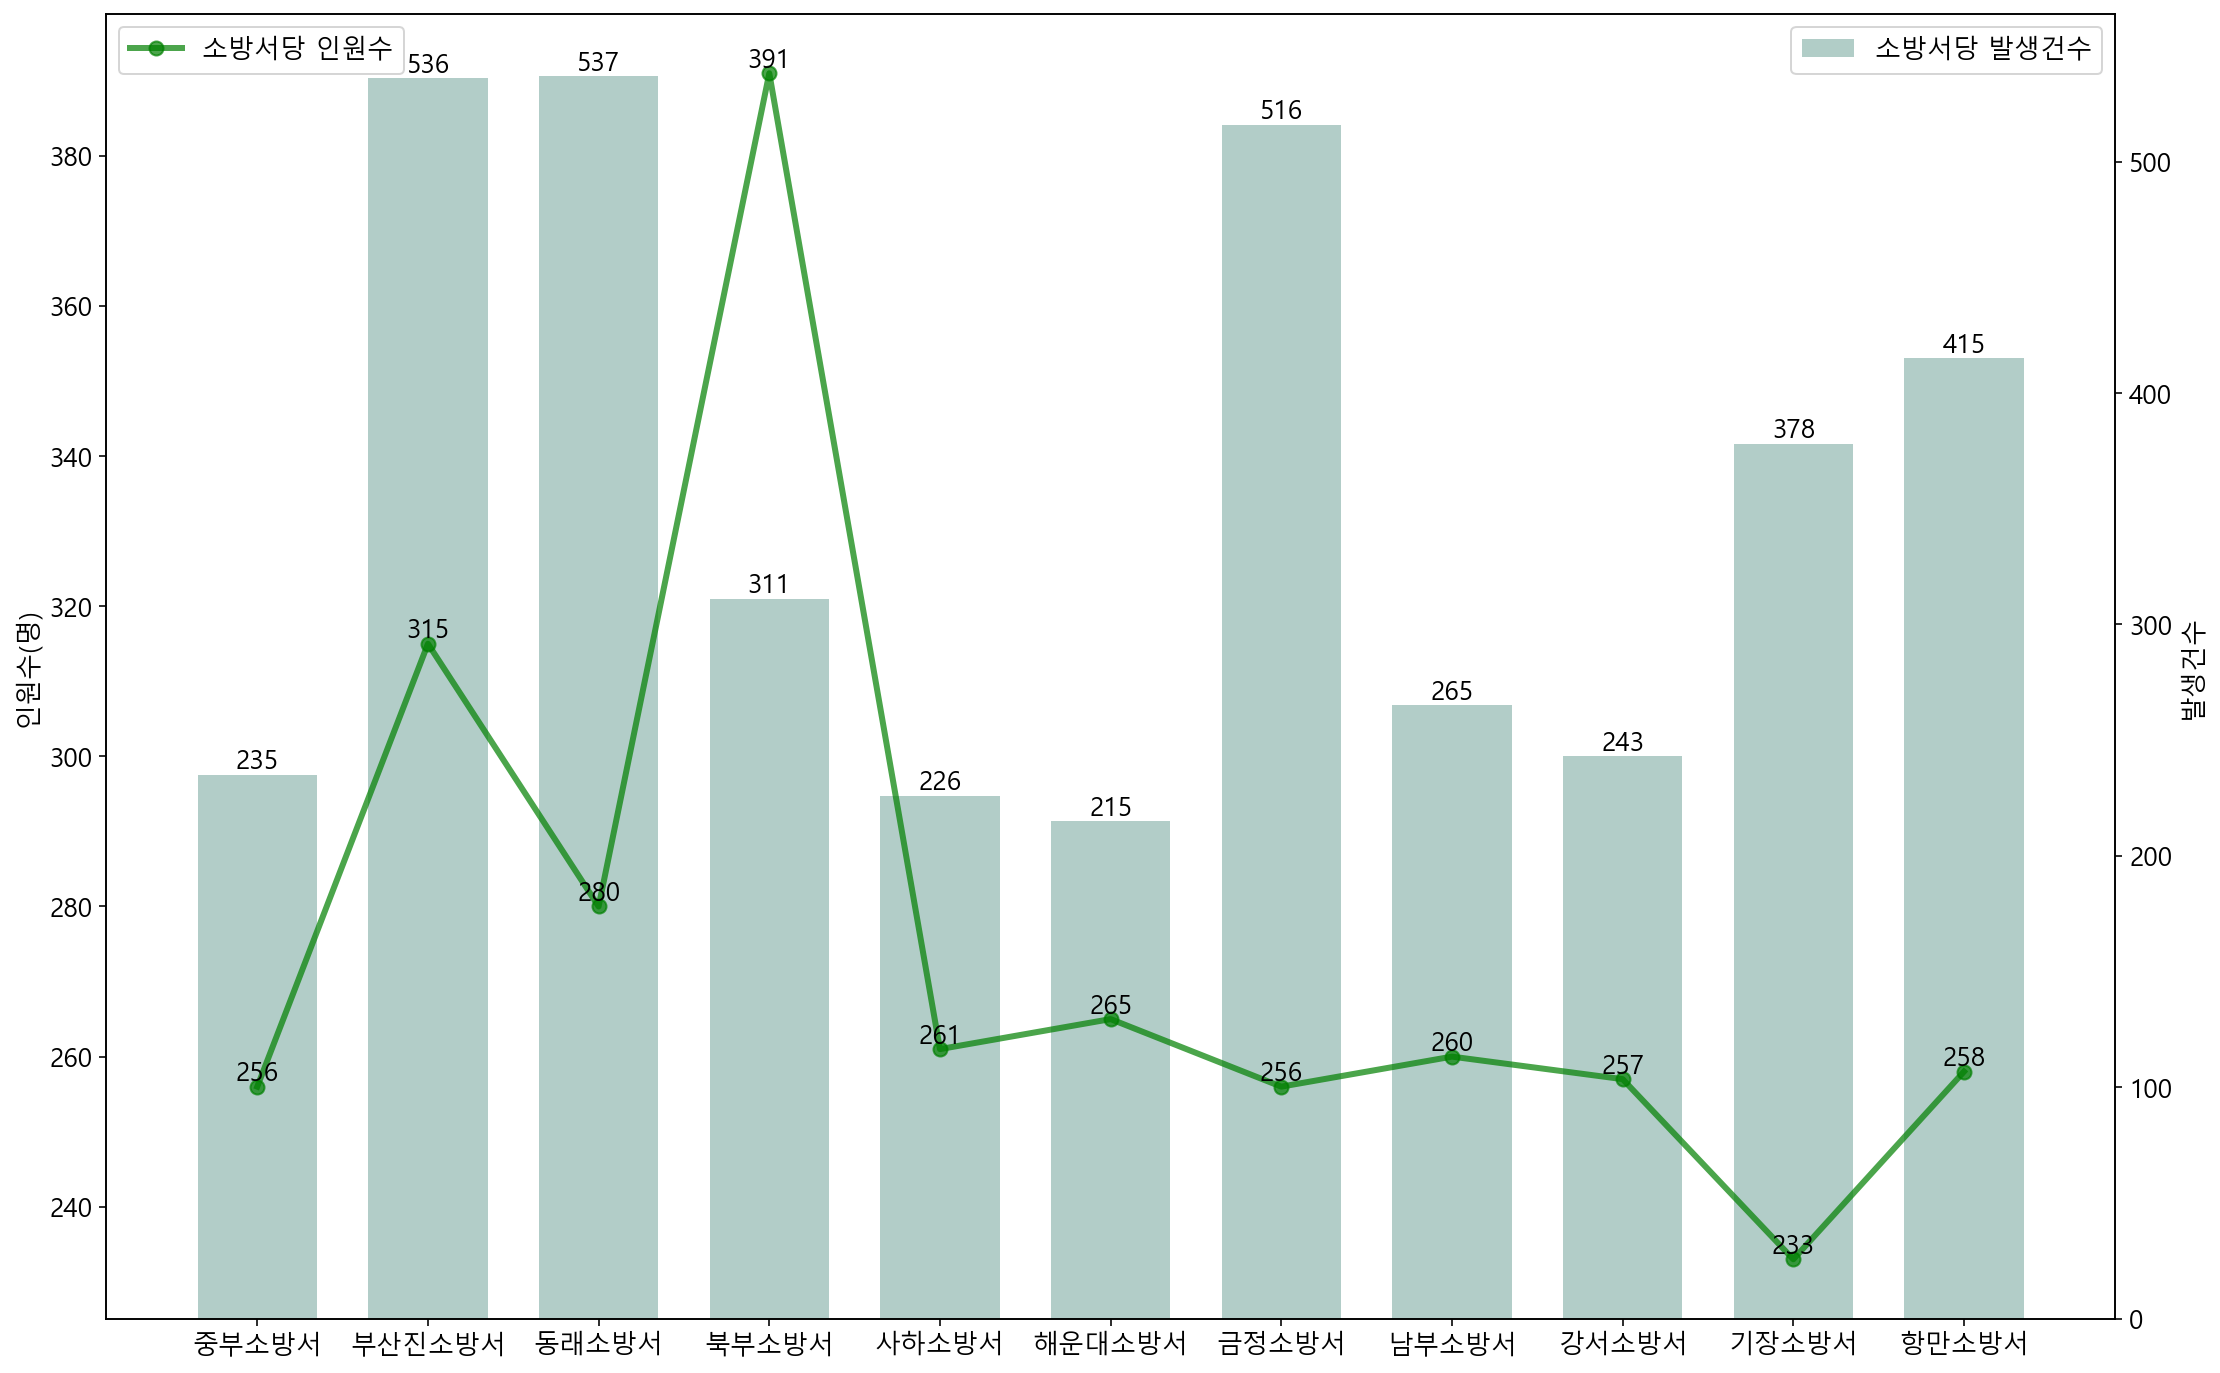

In [20]:
fig, ax1 = plt.subplots(figsize=(18,12))
plt.rc('font', size=13)
plt.rc('xtick', labelsize=13)
ax1.plot(fire_station, fire_station_cnt_sum, color='green', markersize=7, linewidth=3, alpha=0.7, label='소방서당 인원수', marker='o')
for i, v in enumerate(fire_station):
    plt.text(v, fire_station_cnt_sum[i], str(fire_station_cnt_sum[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_ylabel('인원수(명)')
ax2 = ax1.twinx()
ax2.bar(fire_station, fire_station_occur_cnt, color='#92b8b1', label='소방서당 발생건수', alpha=0.7, width=0.7)
for i, v in enumerate(fire_station):
    plt.text(v, fire_station_occur_cnt[i], str(fire_station_occur_cnt[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2.set_ylabel('발생건수')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()